In [1]:
# std
import os
import sys
import re

# 3rd party
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# get connected to the database
connection = pg.connect(user='scientist',
                        password='******',
                        host='127.0.01',
                        port='5432',
                        database='tensor_factorisation_freebase')

In [4]:
entity = psql.read_sql("SELECT * FROM entity", connection)
entity.head()

,synset_id,name
0,1,male
1,2,united_states
2,3,female
3,4,politician
4,5,germany


In [6]:
entity.count()

synset_id    75043
name         75043
dtype: int64

In [7]:
entity_counts = entity.count().to_frame()
entity_counts.head()

,0
synset_id,75043
name,75043


In [8]:
entity_counts = entity_counts.reset_index()
entity_counts.head()

,index,0
0,synset_id,75043
1,name,75043


In [9]:
entity_counts = entity_counts.rename(columns={'index': 'label', 0: 'value'})
entity_counts.head()

,label,value
0,synset_id,75043
1,name,75043


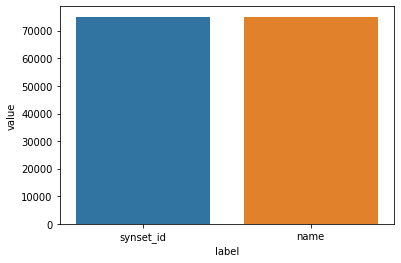

In [10]:
ax = sns.barplot(x="label", y="value", data=entity_counts)

In [11]:
relation = psql.read_sql("SELECT * FROM relation", connection)
relation.head()

,id,name
0,1,gender
1,2,nationality
2,3,profession
3,4,place_of_death
4,5,place_of_birth


In [12]:
relation_counts = relation.count().to_frame()
relation_counts.head()

,0
id,13
name,13


In [13]:
relation_counts = relation_counts.reset_index()
relation_counts.head()

,index,0
0,id,13
1,name,13


In [14]:
relation_counts = relation_counts.rename(columns={'index': 'label', 0: 'value'})
relation_counts.head()

,label,value
0,id,13
1,name,13


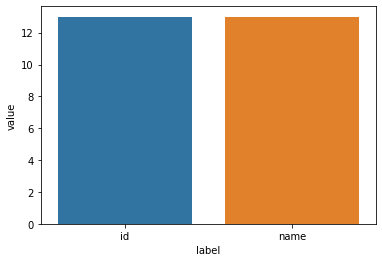

In [15]:
ax = sns.barplot(x="label", y="value", data=relation_counts)

In [16]:
triple = psql.read_sql("SELECT * FROM train UNION SELECT * FROM valid UNION SELECT * FROM test", connection)
triple.head()

,id,subject,predicate,object
0,1,antoine_brutus_menier,religion,roman_catholic_church
1,1,cornelie_van_zanten,gender,female
2,1,umberto_i_of_italy,cause of death,tyrannicide
3,2,cornelie_van_zanten,gender,male
4,2,denys_rayner,cause of death,cancer


In [17]:
triple_counts = triple.count().to_frame()
triple_counts.head()

,0
id,375499
subject,375499
predicate,375499
object,375499


In [18]:
triple_counts = triple_counts.reset_index()
triple_counts.head()

,index,0
0,id,375499
1,subject,375499
2,predicate,375499
3,object,375499


In [19]:
triple_counts = triple_counts.rename(columns={'index': 'label', 0: 'value'})
triple_counts

,label,value
0,id,375499
1,subject,375499
2,predicate,375499
3,object,375499


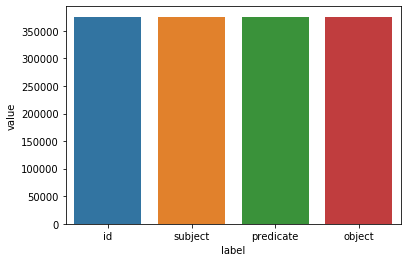

In [20]:
ax = sns.barplot(x="label", y="value", data=triple_counts)

In [21]:
triple_counts.loc[0, 'value']

375499

In [22]:
triple_count = pd.Series({'triple': triple_counts.loc[0, 'value']})
entity_count = pd.Series({'entity': entity_counts.loc[0, 'value']})
relation_count = pd.Series({'relation': relation_counts.loc[0, 'value']})

triple_entity_relation_counts = pd.DataFrame([triple_count, entity_count, relation_count])
triple_entity_relation_counts.head()

,triple,entity,relation
0,375499.0,NaN,NaN
1,NaN,75043.0,NaN
2,NaN,NaN,13.0


In [23]:
triple_entity_relation_counts = pd.DataFrame([triple_counts.loc[0, 'value'], 
                                              entity_counts.loc[0, 'value'], 
                                              relation_counts.loc[0, 'value']], index=['triple', 'entity', 'relation'])
triple_entity_relation_counts.head()

,0
triple,375499
entity,75043
relation,13


In [24]:
triple_entity_relation_counts = triple_entity_relation_counts.reset_index()
triple_entity_relation_counts.head()

,index,0
0,triple,375499
1,entity,75043
2,relation,13


In [25]:
triple_entity_relation_counts = triple_entity_relation_counts.rename(columns={'index': 'label', 0: 'value'})
triple_entity_relation_counts.head()

,label,value
0,triple,375499
1,entity,75043
2,relation,13


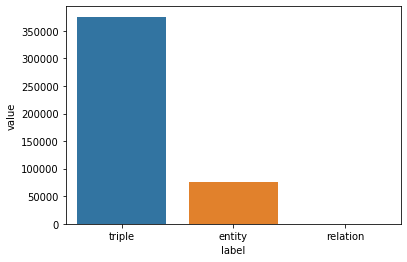

In [26]:
ax = sns.barplot(x="label", y="value", data=triple_entity_relation_counts)

In [27]:
fact = psql.read_sql("SELECT * FROM fact_train UNION SELECT * FROM fact_valid UNION SELECT * FROM fact_test", connection)
fact.head()

,id,subject,s_name,predicate,object,o_name
0,1,1883,umberto_i_of_italy,cause of death,2829,tyrannicide
1,1,13945,antoine_brutus_menier,religion,26,roman_catholic_church
2,1,25719,cornelie_van_zanten,gender,3,female
3,2,1883,umberto_i_of_italy,cause of death,20621,cerebral_aneurysm
4,2,25719,cornelie_van_zanten,gender,1,male


In [28]:
fact = fact.drop(['id'], axis=1)
fact.index.name = 'id'
fact.head()

,subject,s_name,predicate,object,o_name
id,,,,,
0,1883,umberto_i_of_italy,cause of death,2829,tyrannicide
1,13945,antoine_brutus_menier,religion,26,roman_catholic_church
2,25719,cornelie_van_zanten,gender,3,female
3,1883,umberto_i_of_italy,cause of death,20621,cerebral_aneurysm
4,25719,cornelie_van_zanten,gender,1,male


In [29]:
fact_counts = fact.count().to_frame()
fact_counts.head()

,0
subject,375499
s_name,375499
predicate,375499
object,375499
o_name,375499


In [30]:
fact_counts = fact_counts.reset_index()
fact_counts.head()

,index,0
0,subject,375499
1,s_name,375499
2,predicate,375499
3,object,375499
4,o_name,375499


In [31]:
fact_counts = fact_counts.rename(columns={'index': 'label', 0: 'value'})
fact_counts

,label,value
0,subject,375499
1,s_name,375499
2,predicate,375499
3,object,375499
4,o_name,375499


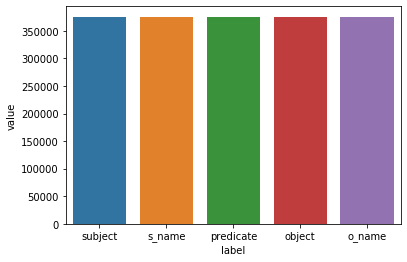

In [32]:
ax = sns.barplot(x="label", y="value", data=fact_counts)

In [33]:
predicate_counts = fact['predicate'].value_counts(dropna=False)
predicate_counts.head(50)

gender            73897
profession        62428
nationality       61319
place of death    40579
place of birth    37970
location          28783
institution       21149
cause of death    14897
religion          11158
ethnicity          6546
parents            6268
children           6041
spouse             4464
Name: predicate, dtype: int64

In [34]:
predicate_counts.index

Index(['gender', 'profession', 'nationality', 'place of death',
       'place of birth', 'location', 'institution', 'cause of death',
       'religion', 'ethnicity', 'parents', 'children', 'spouse'],
      dtype='object')

In [35]:
predicate_counts = predicate_counts.reset_index()
predicate_counts.head()

,index,predicate
0,gender,73897
1,profession,62428
2,nationality,61319
3,place of death,40579
4,place of birth,37970


In [36]:
predicate_counts = predicate_counts.rename(columns={'index': 'label', 'predicate': 'value'})
predicate_counts.head()

,label,value
0,gender,73897
1,profession,62428
2,nationality,61319
3,place of death,40579
4,place of birth,37970


[Text(0, 0, 'gender'),
 Text(0, 0, 'profession'),
 Text(0, 0, 'nationality'),
 Text(0, 0, 'place of death'),
 Text(0, 0, 'place of birth'),
 Text(0, 0, 'location'),
 Text(0, 0, 'institution'),
 Text(0, 0, 'cause of death'),
 Text(0, 0, 'religion'),
 Text(0, 0, 'ethnicity'),
 Text(0, 0, 'parents'),
 Text(0, 0, 'children'),
 Text(0, 0, 'spouse')]

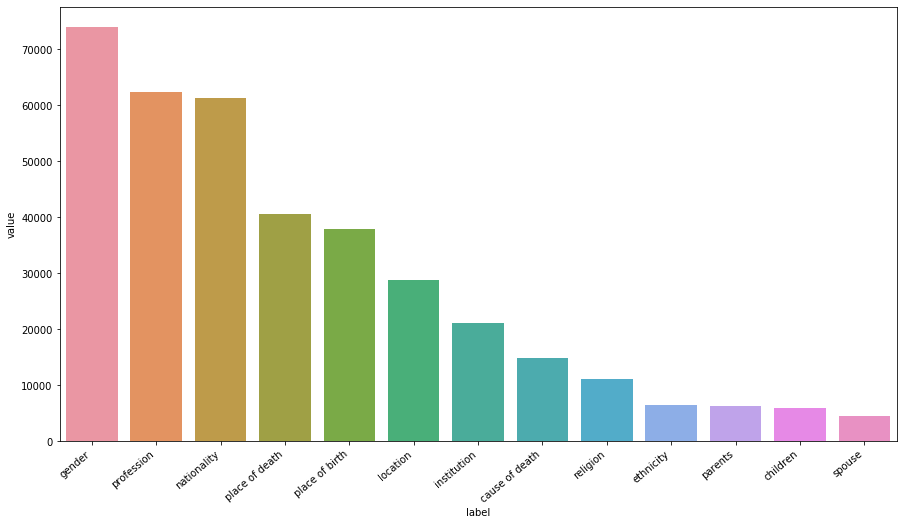

In [37]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="label", y="value", data=predicate_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [38]:
object_counts = fact['o_name'].value_counts(dropna=False).to_frame()
object_counts.head()

,o_name
male,59663
united_states,21074
female,14234
politician,5973
germany,5815


In [39]:
fact.groupby(['object']).head()

,subject,s_name,predicate,object,o_name
id,,,,,
0,1883,umberto_i_of_italy,cause of death,2829,tyrannicide
1,13945,antoine_brutus_menier,religion,26,roman_catholic_church
2,25719,cornelie_van_zanten,gender,3,female
3,1883,umberto_i_of_italy,cause of death,20621,cerebral_aneurysm
4,25719,cornelie_van_zanten,gender,1,male
...,...,...,...,...,...
375445,56598,gerald_verner_white,place of birth,73877,pembroke_canada
375449,3659,michael_i_of_russia,parents,38254,patriarch_filaret
375491,3046,donna_reed,place of birth,58420,denison


In [40]:
object_counts.index

Index(['male', 'united_states', 'female', 'politician', 'germany', 'writer',
       'united_kingdom', 'england', 'france', 'paris',
       ...
       'john_emery', 'vivien_leigh', 'johann_theodor_of_bavaria',
       'vincente_minnelli', 'archduke_anton_prince_of_tuscany',
       'john_loder_1898', 'dan_ii_of_wallachia',
       'gilbert_de_clare_5th_earl_of_hertford',
       'princess_sophie_of_luxembourg', 'hope_portocarrero'],
      dtype='object', length=15342)

In [41]:
object_counts = object_counts.reset_index()
object_counts.head()

,index,o_name
0,male,59663
1,united_states,21074
2,female,14234
3,politician,5973
4,germany,5815


In [42]:
object_counts = object_counts.rename(columns={'index': 'label', 'o_name': 'value'})
object_counts.head()

,label,value
0,male,59663
1,united_states,21074
2,female,14234
3,politician,5973
4,germany,5815


[Text(0, 0, 'male'),
 Text(0, 0, 'united_states'),
 Text(0, 0, 'female'),
 Text(0, 0, 'politician'),
 Text(0, 0, 'germany'),
 Text(0, 0, 'writer'),
 Text(0, 0, 'united_kingdom'),
 Text(0, 0, 'england'),
 Text(0, 0, 'france'),
 Text(0, 0, 'paris'),
 Text(0, 0, 'new_york'),
 Text(0, 0, 'actor'),
 Text(0, 0, 'london'),
 Text(0, 0, 'lawyer'),
 Text(0, 0, 'italy'),
 Text(0, 0, 'catholicism'),
 Text(0, 0, 'canada'),
 Text(0, 0, 'novelist'),
 Text(0, 0, 'singer'),
 Text(0, 0, 'jew'),
 Text(0, 0, 'vienna'),
 Text(0, 0, 'berlin'),
 Text(0, 0, 'journalist'),
 Text(0, 0, 'architect'),
 Text(0, 0, 'rome'),
 Text(0, 0, 'roman_catholic_church'),
 Text(0, 0, 'myocardial_infarction'),
 Text(0, 0, 'los_angeles'),
 Text(0, 0, 'physician'),
 Text(0, 0, 'engineer'),
 Text(0, 0, 'african_american'),
 Text(0, 0, 'austria'),
 Text(0, 0, 'philosopher'),
 Text(0, 0, 'netherlands'),
 Text(0, 0, 'scientist'),
 Text(0, 0, 'mathematician'),
 Text(0, 0, 'washington_united_states'),
 Text(0, 0, 'cancer'),
 Text(0, 0

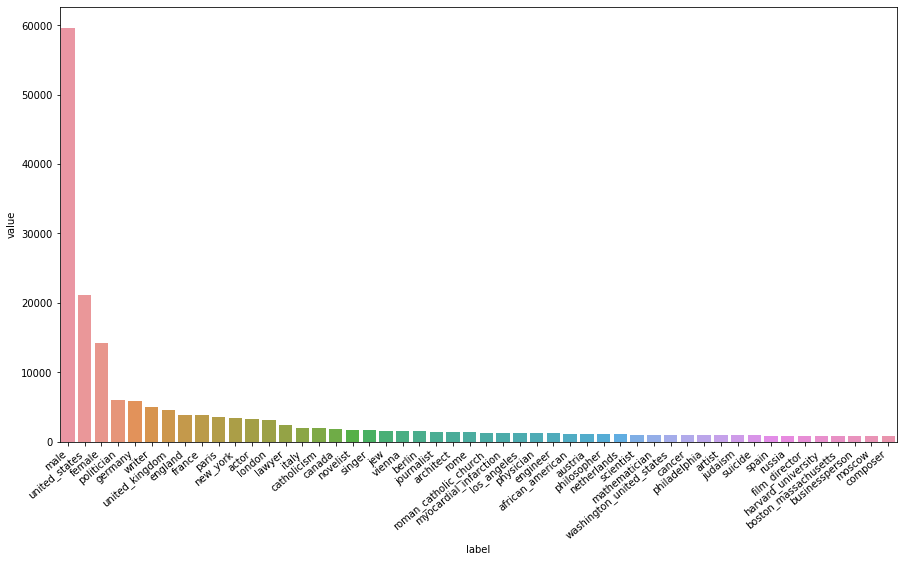

In [43]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="label", y="value", data=object_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [44]:
subject_counts = fact['s_name'].value_counts().to_frame()
subject_counts.head()

,s_name
albert_einstein,37
winston_churchill,29
theodore_roosevelt,29
thomas_jefferson,28
edgar_allan_poe,28


In [45]:
subject_counts.index

Index(['albert_einstein', 'winston_churchill', 'theodore_roosevelt',
       'thomas_jefferson', 'edgar_allan_poe', 'paul_newman', 'carl_sagan',
       'harold_pinter', 'george_iii_of_the_united_kingdom', 'charles_darwin',
       ...
       'marie_anne_de_france', 'cliff_pritchard', 'araya_selassie_yohannes',
       'margaret_of_bourbon_queen_of_navarre', 'augusto_dos_anjos',
       'benjamin_dearborn', 'minamoto_no_yoshiie', 'kalu_rinpoche',
       'chong_ted_tsiung', 'amandus_adamson'],
      dtype='object', length=67393)

In [46]:
subject_counts = subject_counts.reset_index()
subject_counts.head()

,index,s_name
0,albert_einstein,37
1,winston_churchill,29
2,theodore_roosevelt,29
3,thomas_jefferson,28
4,edgar_allan_poe,28


In [47]:
subject_counts = subject_counts.rename(columns={'index': 'label', 's_name': 'value'})
subject_counts.head()

,label,value
0,albert_einstein,37
1,winston_churchill,29
2,theodore_roosevelt,29
3,thomas_jefferson,28
4,edgar_allan_poe,28


[Text(0, 0, 'albert_einstein'),
 Text(0, 0, 'winston_churchill'),
 Text(0, 0, 'theodore_roosevelt'),
 Text(0, 0, 'thomas_jefferson'),
 Text(0, 0, 'edgar_allan_poe'),
 Text(0, 0, 'paul_newman'),
 Text(0, 0, 'carl_sagan'),
 Text(0, 0, 'harold_pinter'),
 Text(0, 0, 'george_iii_of_the_united_kingdom'),
 Text(0, 0, 'charles_darwin'),
 Text(0, 0, 'john_von_neumann'),
 Text(0, 0, 'benjamin_franklin'),
 Text(0, 0, 'jacqueline_kennedy_onassis'),
 Text(0, 0, 'milton_friedman'),
 Text(0, 0, 'michael_crichton'),
 Text(0, 0, 'george_harrison'),
 Text(0, 0, 'johann_sebastian_bach'),
 Text(0, 0, 'john_lennon'),
 Text(0, 0, 'woodrow_wilson'),
 Text(0, 0, 'robert_f_kennedy'),
 Text(0, 0, 'john_denver'),
 Text(0, 0, 'alan_turing'),
 Text(0, 0, 'karl_marx'),
 Text(0, 0, 'johann_wolfgang_goethe'),
 Text(0, 0, 'isaac_asimov'),
 Text(0, 0, 'nicholas_ii_of_russia'),
 Text(0, 0, 'langston_hughes'),
 Text(0, 0, 'nikola_tesla'),
 Text(0, 0, 'alexander_ii_of_russia'),
 Text(0, 0, 'francis_i_holy_roman_emperor'),

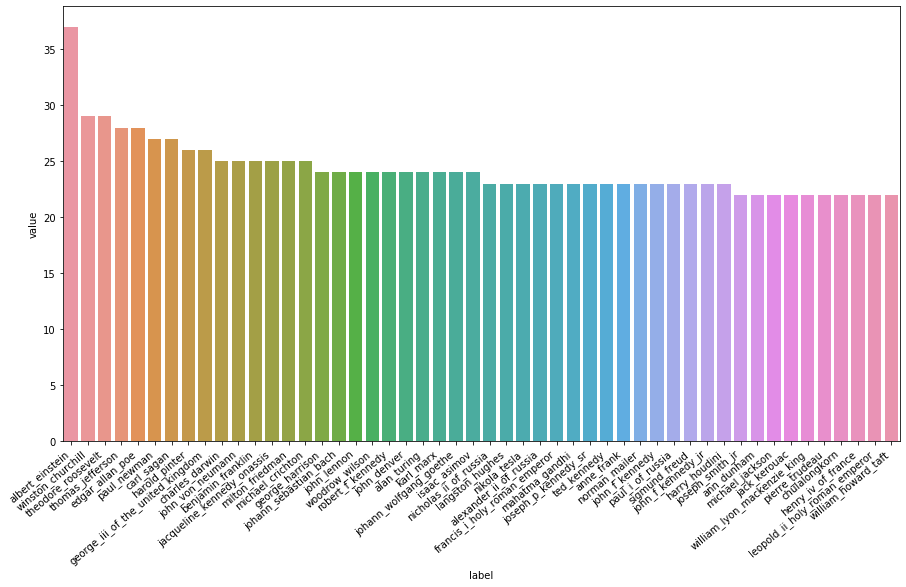

In [48]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="label", y="value", data=subject_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")